# Check likelihood calculation using the DataFrame stored in pickle file

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas.io.json import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
#Merge with SModelS DataFrame
dataDF = pd.read_pickle('EWino_scanRandom.pcl')
# print(dataDF.columns.values.tolist()) #Print all columns names

In [3]:
exptResults = ['.'.join(label.split('.')[:2]) for label in dataDF.columns.values.tolist() if 'ExptRes.result' in label]
exptResults = sorted(list(set(exptResults)))

In [4]:
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
dataDF.fillna(value={'ExptRes.result0.likelihood' : 0.0},inplace=True)
dataDF.fillna(value={'ExptRes.result0.l_max' : 0.0},inplace=True)
dataDF.fillna(value={'ExptRes.result0.l_SM' : 0.0},inplace=True)
dataDF['ExptRes.result0.chi2'] = -2*np.log(dataDF['ExptRes.result0.likelihood']/dataDF['ExptRes.result0.l_max'])

dataDF.fillna(value={'ExptRes.result1.r' : 0.0},inplace=True)
dataDF.fillna(value={'ExptRes.result1.likelihood' : 0.0},inplace=True)
dataDF.fillna(value={'ExptRes.result1.l_max' : 0.0},inplace=True)
dataDF.fillna(value={'ExptRes.result1.l_SM' : 0.0},inplace=True)
dataDF['ExptRes.result1.chi2'] = -2*np.log(dataDF['ExptRes.result1.likelihood']/dataDF['ExptRes.result1.l_max'])

# for expLabel in exptResults:
#     dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#     try:
#         dataDF.fillna(value={label+'.likelihood' : 0.0},inplace=True)
#         dataDF.fillna(value={label+'.l_max' : 0.0},inplace=True)
#         dataDF.fillna(value={label+'.l_SM' : 0.0},inplace=True)
#         #Compute chi2
#         dataDF[expLabel+'.chi2'] = -2*np.log(dataDF[expLabel+'.likelihood']/dataDF[expLabel+'.l_SM'])
#         dataDF.replace([np.inf, -np.inf], np.nan, inplace=True)
#         dataDF.fillna(value={label+'.chi2' : 0.0},inplace=True)        
#     except:
#         dataDF[label+'.chi2'] = [0]*len(dataDF)

/home/lessa/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


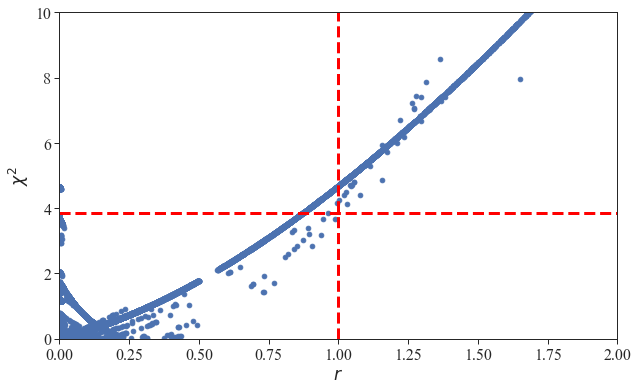

In [5]:
plt.figure(figsize=(10,6))
#Points with chi2 is nan or inf will be skipped
plt.scatter(dataDF['ExptRes.result0.r'],dataDF['ExptRes.result0.chi2'])
plt.xlabel(r'$r$')
plt.ylabel(r'$\chi^2$')
plt.hlines(y=3.84,xmin=0,xmax=80,linestyle='--',linewidth=3,color='red')
plt.vlines(x=1.00,ymin=0,ymax=100,linestyle='--',linewidth=3,color='red')
plt.xlim(0,2)
plt.ylim(0,10)
plt.show()

In [9]:
dataDF[(dataDF['ExptRes.result0.r'] < 0.2) & (dataDF['ExptRes.result0.chi2'] > 3.8)][['ExptRes.result0.r','ExptRes.result0.chi2','filename']]

,ExptRes.result0.r,ExptRes.result0.chi2,filename
492,0.000585,4.648582,ew_y8gxon4_.slha
850,0.001391,4.633064,ew_8ski1yt7.slha
1208,0.000933,4.641878,ew_focsins7.slha
1272,0.000015,4.659566,ew_wy3p1j23.slha
1544,0.000159,4.656789,ew_qdvzii1_.slha
...,...,...,...
95176,0.000249,4.655042,ew_68m7y96o.slha
95803,0.000094,4.658031,ew_g4dhiq35.slha
95845,0.000014,4.659575,ew_zxqaw_ox.slha
96208,0.000094,4.658028,ew_cj_kwkco.slha


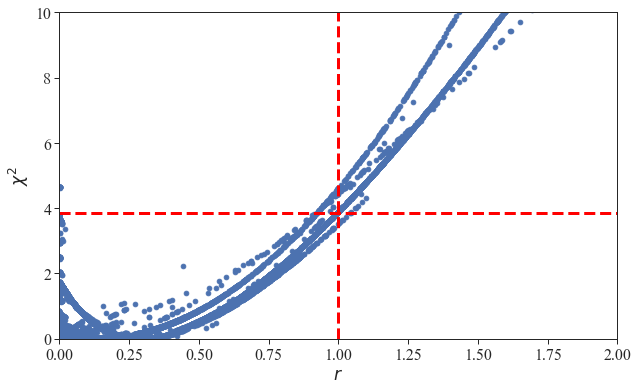

In [18]:
plt.figure(figsize=(10,6))
#Points with chi2 is nan or inf will be skipped
plt.scatter(dataDF['ExptRes.result1.r'],dataDF['ExptRes.result1.chi2'])
plt.xlabel(r'$r$')
plt.ylabel(r'$\chi^2$')
plt.hlines(y=3.84,xmin=0,xmax=80,linestyle='--',linewidth=3,color='red')
plt.vlines(x=1.00,ymin=0,ymax=100,linestyle='--',linewidth=3,color='red')
plt.xlim(0,2)
plt.ylim(0,10)
plt.show()

In [10]:
-2*np.log(2.032e-05/2.077E-04)

4.648978216343571